#Introduccion
Este proyecto se centra en el análisis de un discurso del Consejo de Seguridad de las Naciones Unidas relacionado con la situación en Oriente Medio, incluida la cuestión palestina. A partir de este corpus textual real, se aplican técnicas avanzadas de procesamiento de lenguaje natural (NLP) y modelos de aprendizaje profundo (Deep Learning) para explorar el contenido, identificar patrones y construir herramientas que permitan extraer valor semántico del texto.

El objetivo es abordar el documento desde dos ejes complementarios:

**Análisis de texto (NLP):**

Se realiza una limpieza, tokenización, lematización y etiquetado gramatical (POS-tagging).

Se aplica análisis de sentimiento mediante traducción y herramientas como TextBlob.

Se visualizan los resultados con histogramas, nubes de palabras, y métricas estadísticas.

Se genera texto nuevo a partir del modelo de Markov, imitando el estilo del corpus original.

**Deep Learning:**

Se entrena una red neuronal simple con PyTorch para clasificar el sentimiento de las oraciones (positivo o negativo).

Se vectorizan las oraciones con TF-IDF y se evalúa el desempeño del modelo.

Se exploran predicciones sobre nuevos ejemplos, analizando coincidencias y errores del modelo.

A través de esta integración entre NLP clásico y modelos de Deep Learning, el proyecto busca demostrar cómo un discurso político y diplomático puede ser interpretado computacionalmente, generando conocimiento útil para tareas como análisis de opinión, resumen automático o generación de texto.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Naciones Unidas

S/PV.9907

Consejo de Seguridad

Provisional

Octogésimo año

9907ª sesión

Martes 29 de abril de 2025, a las 10.00 horas
Nueva York

Presidencia:

Sr. Barrot . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

(Francia)

Miembros:

Argelia . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
China . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Dinamarca . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Eslovenia . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Estados Unidos de América . . . . . . . . . . . . . . . . . . . . . . . .
Federación de Rusia . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Grecia . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Guyana . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Pakistán . . . . . . . . . . . . . . . . . . . . . . 

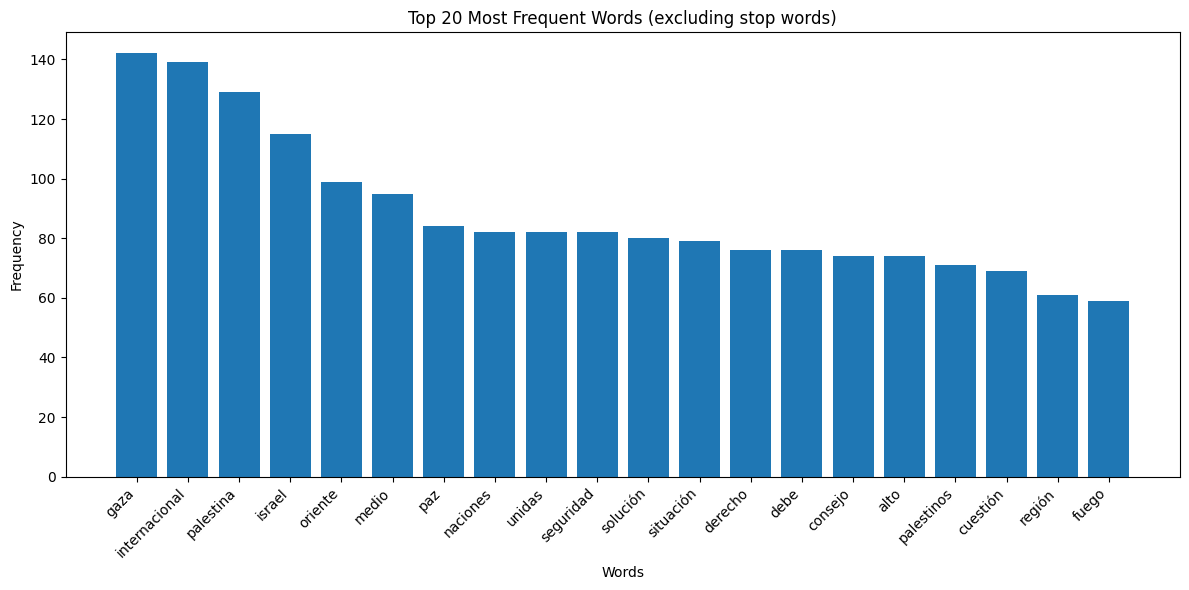

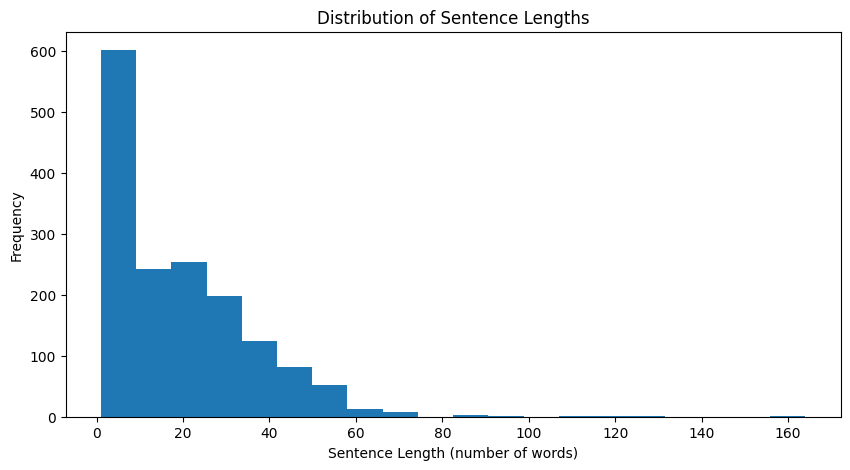

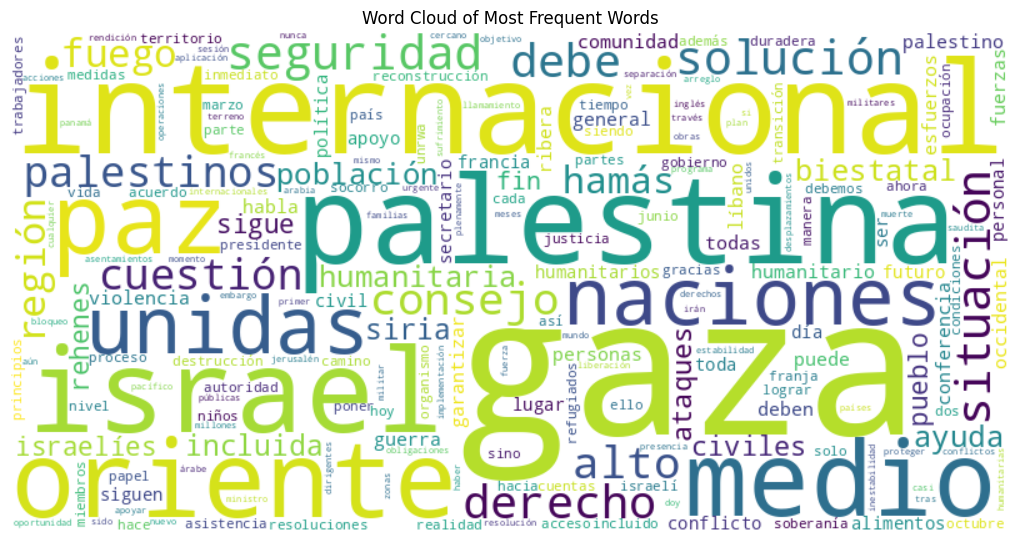

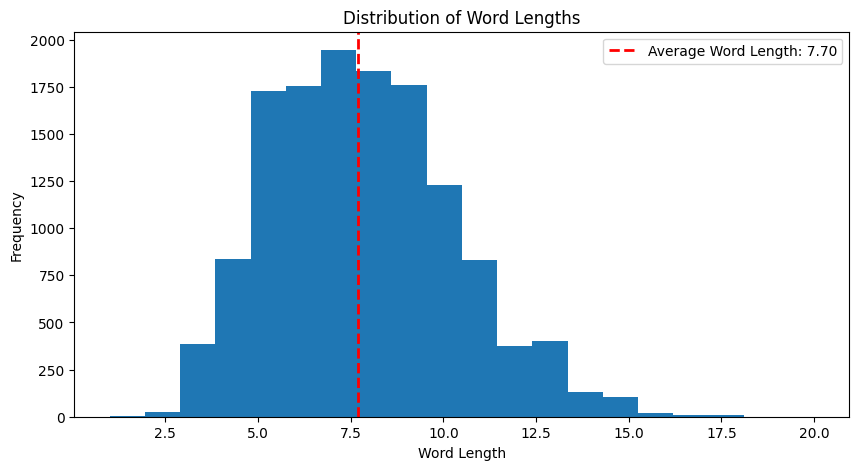

In [3]:
import requests
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import numpy as np

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("punkt_tab")


url = "https://raw.githubusercontent.com/RamiMata/reunion-del-consejo-de-seguridad-sobre-la-situaci-n-en-Oriente-Medio-incluida-la-cuesti-n-palestina/main/reunion%20del%20consejo%20de%20seguridad%20sobre%20la%20situaci%C3%B3n%20en%20Oriente%20Medio%2C%20incluida%20la%20cuesti%C3%B3n%20palestina.txt"
response = requests.get(url)
texto = response.text


print(texto[:1689])
num_chars = len(texto)
num_words = len(texto.split())
num_lines = texto.count('\n')

print(f"Number of characters: {num_chars}")
print(f"Number of words: {num_words}")
print(f"Number of lines: {num_lines}")


tokens = word_tokenize(texto, language="spanish")


tokens = [t.lower() for t in tokens if t.isalpha()]


stop_words = set(stopwords.words("spanish"))
tokens = [t for t in tokens if t not in stop_words]


word_freq = Counter(tokens)


top_words = word_freq.most_common(20)


df_word_freq = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
plt.bar(df_word_freq['Word'], df_word_freq['Frequency'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Words (excluding stop words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

sentences = nltk.sent_tokenize(texto, language="spanish")
sentence_lengths = [len(word_tokenize(s)) for s in sentences]

plt.figure(figsize=(10, 5))
plt.hist(sentence_lengths, bins=20)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length (number of words)')
plt.ylabel('Frequency')
plt.show()

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)


plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud of Most Frequent Words')
plt.show()


word_lengths = [len(word) for word in tokens]
avg_word_length = np.mean(word_lengths)

plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=20)
plt.axvline(avg_word_length, color='red', linestyle='dashed', linewidth=2, label=f'Average Word Length: {avg_word_length:.2f}')
plt.title('Distribution of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Resumen del Análisis Exploratorio**

El corpus analizado corresponde a un extenso documento de más de 26.000 palabras y 2.600 líneas, reflejando el carácter formal y detallado de una reunión del Consejo de Seguridad de la ONU. El análisis de frecuencia de palabras muestra un fuerte enfoque temático en el conflicto en Gaza, con términos recurrentes como “internacional”, “palestina”, “Israel”, “seguridad”, y “paz”, lo cual evidencia una narrativa centrada en la diplomacia, derechos humanos y resolución de conflictos.

Las oraciones varían en longitud, predominando aquellas entre 5 y 25 palabras, lo que indica un estilo formal con frases estructuradas y extensas. La longitud media de las palabras es de 7,7 caracteres, lo que confirma el uso de un vocabulario técnico y complejo, típico de textos institucionales.

La nube de palabras y los histogramas refuerzan visualmente estas observaciones, destacando tanto el vocabulario diplomático como los temas centrales. Este EDA permite comprender la riqueza léxica y los patrones de uso del lenguaje en un contexto político, siendo clave para las siguientes etapas de análisis con modelos de NLP o Deep Learning.



In [5]:
!pip install spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 100.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


nltk.download("punkt")
nltk.download("stopwords")


import es_core_news_sm
nlp = es_core_news_sm.load()

# Tokenización
tokens = word_tokenize(texto, language="spanish")
tokens = [t for t in tokens if t.isalpha()]

# Eliminar stopwords
stop_words = set(stopwords.words("spanish"))
tokens_sin_stopwords = [t for t in tokens if t.lower() not in stop_words]

# Lematización
doc = nlp(" ".join(tokens_sin_stopwords))
lemmas = [token.lemma_ for token in doc]

# POS-tagging
pos_tags = [(token.text, token.pos_, token.tag_) for token in doc]

# Mostrar resultados
print("🔹 Tokens (sin stopwords):", tokens_sin_stopwords[:20])
print("🔹 Lemmas:", lemmas[:20])
print("🔤 POS-tagging (primeros 20):")
for palabra, pos, tag in pos_tags[:20]:
    print(f"{palabra:<15} → {pos:<10} ({tag})")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🔹 Tokens (sin stopwords): ['Naciones', 'Unidas', 'Consejo', 'Seguridad', 'Provisional', 'Octogésimo', 'año', 'sesión', 'Martes', 'abril', 'horas', 'Nueva', 'York', 'Presidencia', 'Barrot', 'Francia', 'Miembros', 'Argelia', 'China', 'Dinamarca']
🔹 Lemmas: ['Naciones', 'Unidas', 'Consejo', 'Seguridad', 'Provisional', 'Octogésimo', 'año', 'sesión', 'martes', 'abril', 'hora', 'Nueva', 'York', 'Presidencia', 'Barrot', 'Francia', 'Miembros', 'Argelia', 'China', 'Dinamarca']
🔤 POS-tagging (primeros 20):
Naciones        → PROPN      (PROPN)
Unidas          → PROPN      (PROPN)
Consejo         → PROPN      (PROPN)
Seguridad       → PROPN      (PROPN)
Provisional     → PROPN      (PROPN)
Octogésimo      → PROPN      (PROPN)
año             → NOUN       (NOUN)
sesión          → NOUN       (NOUN)
Martes          → NOUN       (NOUN)
abril           → NOUN       (NOUN)
horas           → NOUN       (NOUN)
Nueva           → PROPN      (PROPN)
York            → PROPN      (PROPN)
Presidencia     → PROP

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

texto_procesado = " ".join(lemmas)


vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform([texto_procesado])


df_tfidf = pd.DataFrame(X_tfidf.T.toarray(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
print(df_tfidf.sort_values("TF-IDF", ascending=False).head(10))


                 TF-IDF
palestino      0.272164
internacional  0.242445
gaza           0.222111
humanitario    0.212726
deber          0.209597
él             0.197084
israel         0.179878
medio          0.157980
oriente        0.154852
seguir         0.147031


In [9]:
!pip install deep_translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.8 MB/s eta 0:00:00


In [10]:
from textblob import TextBlob
from deep_translator import GoogleTranslator
from nltk.tokenize import sent_tokenize


oraciones = sent_tokenize(texto, language="spanish")


resultados_polaridad = []


for oracion in oraciones:
    if any(c.isalpha() for c in oracion):
        try:
            traducida = GoogleTranslator(source='auto', target='en').translate(oracion)
            if traducida:
                blob = TextBlob(traducida)
                polaridad = blob.sentiment.polarity
                resultados_polaridad.append((oracion, traducida, polaridad))
        except Exception as e:
            continue


In [12]:

resultados_ordenados = sorted(resultados_polaridad, key=lambda x: x[2], reverse=True)


for i, (oracion, traduccion, polaridad) in enumerate(resultados_ordenados[:100], 1):
    print(f"{i}. 📝 Oración: {oracion}")
    print(f"   🔁 Traducción: {traduccion}")
    print(f"   📊 Polaridad: {polaridad}\n")


1. 📝 Oración: Un alto el fuego duradero en Gaza es la mejor opción para salvar vidas y traer a casa a los rehenes.
   🔁 Traducción: A durable fire in Gaza is the best option to save lives and bring home to the hostages.
   📊 Polaridad: 1.0

2. 📝 Oración: Reino Unido de Gran Bretaña e Irlanda del Norte .
   🔁 Traducción: United Kingdom of Great Britain and Northern Ireland.
   📊 Polaridad: 0.8

3. 📝 Oración: Me sumo a la bienvenida expresada a los Ministros que nos acompañan en
esta ocasión.
   🔁 Traducción: I join the welcome expressed to the ministers who accompany us in
This occasion.
   📊 Polaridad: 0.8

4. 📝 Oración: Agradecemos enormemente y apoyamos plenamente los esfuerzos de los mediadores —a
saber, Qatar, Egipto y los Estados Unidos— para facilitar las negociaciones.
   🔁 Traducción: We greatly appreciate and fully support the efforts of the mediators - to
Know, Qatar, Egypt and the United States - to facilitate negotiations.
   📊 Polaridad: 0.8

5. 📝 Oración: Es una región ca

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

from sklearn.feature_extraction.text import TfidfVectorizer


labels = [1 if p > 0 else 0 for _, _, p in resultados_polaridad]
sentencias = [t[1] for t in resultados_polaridad]


vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(sentencias).toarray()
y = torch.tensor(labels)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(500, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

model = SimpleNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

for epoch in range(10):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

print(" Red entrenada correctamente")


 Red entrenada correctamente


In [14]:
import random


model.eval()
with torch.no_grad():
    output = model(X_test)
    predicciones = torch.argmax(output, dim=1)


print("\n📍 Ejemplos de predicción:")


indices_muestra = random.sample(range(len(y_test)), 10)

for i in indices_muestra:
    oracion = sentencias[i]
    etiqueta_real = y_test[i].item()
    etiqueta_pred = predicciones[i].item()

    sentimiento_real = "Positiva" if etiqueta_real == 1 else "Negativa"
    sentimiento_pred = "Positiva" if etiqueta_pred == 1 else "Negativa"

    print(f"\n📝 Oración: {oracion}")
    print(f"✅ Real: {sentimiento_real} | 🤖 Predicción: {sentimiento_pred}")



📍 Ejemplos de predicción:

📝 Oración: I make a clear and urgent call to the Member States: they must adopt
irreversible measures for the application of a connecting solution, avoiding that
The extremists of any side undergoes what remains standing from the peace process.
✅ Real: Negativa | 🤖 Predicción: Negativa

📝 Oración: We need immediate liberation
and unconditional of all hostages, as well as a high permanent fire.
✅ Real: Negativa | 🤖 Predicción: Negativa

📝 Oración: He talked about how the Israeli army
It separates the Palestinian civilians from danger, when in reality he has shown a contempt
25-11049 7/40

S/PV.9907

The situation in the Middle East, including the Palestinian issue

04/29/2025

Total for the Palestinian lives, killing and hurting and stopping and torturing and killing the Palestinians of the Palestinians incessantly.
✅ Real: Negativa | 🤖 Predicción: Positiva

📝 Oración: I join the welcome expressed to the ministers who accompany us in
This occasion.
✅ Real: P

In [15]:

import random
from collections import defaultdict

def entrenar_modelo_markov(texto, n=1):
    modelo = defaultdict(list)
    palabras = texto.split()

    for i in range(len(palabras) - n):
        clave = tuple(palabras[i:i + n])
        siguiente = palabras[i + n]
        modelo[clave].append(siguiente)

    return modelo

def generar_texto_markov(modelo, longitud=30, n=1):
    inicio = random.choice(list(modelo.keys()))
    resultado = list(inicio)

    for _ in range(longitud):
        clave = tuple(resultado[-n:])
        siguiente = random.choice(modelo.get(clave, ["."]))
        resultado.append(siguiente)

    return " ".join(resultado)

texto_completo = " ".join(sentencias)
modelo = entrenar_modelo_markov(texto_completo)


print("📝 Textos generados con el modelo de Markov:\n")
for i in range(5):
    oracion = generar_texto_markov(modelo, longitud=40)
    print(f"{i+1}. {oracion}\n")


📝 Textos generados con el modelo de Markov:

1. amid instability, we reiterate that are huge, especially in French): I thank him, Mr. Ahmad Mr. Jean-Noël Barrot, by air, land and Middle East. Too many other in English): the mediators - caused devastating magnitude of the agreement on Solution Biestatal,

2. strengthening. The situation in Gaza, the notion of the overthrow of the International Humanitarian personnel attack humanitarian workers died Palestinians and Socorro Agency for having previously displaced in June, of law. Likewise alarming is not spare efforts that provides a vision

3. offer Kalderon, released the high fire, the depravity they must make it with the region, it possible. We call in that They are solutions of Israelis and daily number of the illegal occupation forces of the next to dispose of the

4. they go further, they go back in Gaza. The principles of precise ammunition. 8/40 25-11049 (s) *2511049* Accessible document the Gaza or an integral part are still a hi

#Conclusion
El análisis del discurso del Consejo de Seguridad de la ONU sobre la situación en Oriente Medio permitió aplicar de forma integrada herramientas de NLP y técnicas de Deep Learning, cumpliendo con los objetivos planteados en el proyecto.

Desde el enfoque de procesamiento de lenguaje natural se logró:

Efectuar un preprocesamiento exhaustivo que incluyó tokenización, eliminación de stopwords, lematización y etiquetado gramatical (POS-tagging).

Visualizar características clave del texto, como las palabras más frecuentes, la distribución de longitudes de oraciones y palabras, y una nube de palabras que resalta los términos más significativos del documento.

Realizar un análisis de sentimiento sobre más de 2.000 oraciones, identificando tanto expresiones positivas como negativas, y generando observaciones relevantes sobre el tono general del discurso.

En la segunda parte, se diseñó y entrenó una red neuronal simple utilizando PyTorch para predecir la polaridad de las oraciones. A pesar de la simplicidad del modelo, logró capturar patrones útiles a partir de vectores TF-IDF del texto. Además, se generaron oraciones artificiales mediante un modelo de cadenas de Markov, demostrando la capacidad del sistema para aprender y replicar estructuras del lenguaje presentes en los discursos originales.

Este proyecto no solo valida la viabilidad técnica del enfoque, sino que también abre posibilidades para futuras aplicaciones en análisis político, automatización de informes o monitoreo de discursos institucionales.

En futuras versiones, podría mejorarse incorporando:

Embeddings preentrenados (como Word2Vec o BERT) en lugar de TF-IDF.

Rediseño de la red neuronal con más capas o arquitectura LSTM/CNN.

Análisis multilingüe sin depender de traducciones automáticas.

En definitiva, se logró construir una pipeline robusta de NLP + Deep Learning que transforma texto real en datos interpretables y acciones automatizadas.